### Setup

In [1]:
# set libraries to refresh
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from tqdm.notebook import tqdm
import pandas as pd
import geopandas as gpd

# import kml reading and set supported driver
import fiona
fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [3]:
from clustering.utils import get_cluster_pivot_gdf
from utils import plot_weights_vs_radii, save_shapefiles

### Custom function for this notebook

In [4]:
def load_and_process_barangay(selected_barangay_filepath) -> gpd.GeoDataFrame:

    cluster_gdf = gpd.read_parquet(selected_barangay_filepath)
    unique_cluster_id = (
        "B_" + cluster_gdf["PSGC"].astype(str) + "_" + cluster_gdf["cluster_id"]
    )
    cluster_gdf.insert(8, "unique_cluster_id", unique_cluster_id)

    return cluster_gdf

### Load data

In [5]:
ROOT_DIR = Path("..")
INPUT_DATA_DIR = ROOT_DIR / "data" / "output" / "lambda_processed"
# OUTPUT_DATA_DIR = ROOT_DIR / "data" / "output"
OUTPUT_DATA_DIR = ROOT_DIR / "data_hpls" / "02_modeloutputs" / "online"

In [6]:
# get cercle folderpaths for selected regions
filepaths = list(INPUT_DATA_DIR.glob("*"))
# filepaths = filepaths[:100]

In [7]:
# load and process all barangays
grid_gdf_list = []
for filepath in tqdm(filepaths):
    grid_gdf = load_and_process_barangay(filepath)
    grid_gdf_list.append(grid_gdf)

  0%|          | 0/41123 [00:00<?, ?it/s]

### Combine barangays

In [8]:
grid_gdf = pd.concat(grid_gdf_list)
grid_gdf

,Lat,Lon,population,PSGC,urban,geometry,grid_id,cluster_id,unique_cluster_id,cluster_weight,dense_area_guess
521,9.907500,124.351666,2.270146,701234020,False,POINT (124.35167 9.90750),GRID_19503329,CLUSTER_1,B_701234020_CLUSTER_1,291.027710,0
721,9.903333,124.341666,1.085855,701234020,False,POINT (124.34167 9.90333),GRID_19515774,CLUSTER_1,B_701234020_CLUSTER_1,291.027710,0
1068,9.896667,124.350000,0.840612,701234020,False,POINT (124.35000 9.89667),GRID_19535904,CLUSTER_1,B_701234020_CLUSTER_1,291.027710,0
643,9.905000,124.350833,1.383262,701234020,False,POINT (124.35083 9.90500),GRID_19510813,CLUSTER_1,B_701234020_CLUSTER_1,291.027710,0
644,9.905000,124.351666,1.504231,701234020,False,POINT (124.35167 9.90500),GRID_19510814,CLUSTER_1,B_701234020_CLUSTER_1,291.027710,0
...,...,...,...,...,...,...,...,...,...,...,...
27,17.964167,120.699166,2.803823,102811006,False,POINT (120.69917 17.96417),GRID_01126089,CLUSTER_3_1,B_102811006_CLUSTER_3_1,302.546173,1
26,17.964167,120.698333,2.749018,102811006,False,POINT (120.69833 17.96417),GRID_01126088,CLUSTER_3_1,B_102811006_CLUSTER_3_1,302.546173,1
24,17.963333,120.704166,2.855458,102811006,False,POINT (120.70417 17.96333),GRID_01127575,CLUSTER_3_1,B_102811006_CLUSTER_3_1,302.546173,1
22,17.965833,120.700000,2.364312,102811006,False,POINT (120.70000 17.96583),GRID_01123129,CLUSTER_3_1,B_102811006_CLUSTER_3_1,302.546173,1


In [9]:
grid_gdf = grid_gdf.sort_values(by=["grid_id"])
grid_gdf = grid_gdf.reset_index(drop=True)
grid_gdf

,Lat,Lon,population,PSGC,urban,geometry,grid_id,cluster_id,unique_cluster_id,cluster_weight,dense_area_guess
0,21.069167,121.933333,0.073103,200902010,False,POINT (121.93333 21.06917),GRID_00000001,CLUSTER_2,B_200902010_CLUSTER_2,16.314615,0
1,21.069167,121.934166,0.073408,200902010,False,POINT (121.93417 21.06917),GRID_00000002,CLUSTER_2,B_200902010_CLUSTER_2,16.314615,0
2,21.069167,121.935000,0.074597,200902010,False,POINT (121.93500 21.06917),GRID_00000003,CLUSTER_2,B_200902010_CLUSTER_2,16.314615,0
3,21.068333,121.932500,0.072160,200902010,False,POINT (121.93250 21.06833),GRID_00000004,CLUSTER_2,B_200902010_CLUSTER_2,16.314615,0
4,21.068333,121.933333,0.062746,200902010,False,POINT (121.93333 21.06833),GRID_00000005,CLUSTER_2,B_200902010_CLUSTER_2,16.314615,0
...,...,...,...,...,...,...,...,...,...,...,...
32485150,4.588334,119.466666,2.814211,1907011007,False,POINT (119.46667 4.58833),GRID_32485151,CLUSTER_1,B_1907011007_CLUSTER_1,254.887955,0
32485151,4.588334,119.467500,3.035482,1907011007,False,POINT (119.46750 4.58833),GRID_32485152,CLUSTER_1,B_1907011007_CLUSTER_1,254.887955,0
32485152,4.588334,119.468333,2.983073,1907011007,False,POINT (119.46833 4.58833),GRID_32485153,CLUSTER_1,B_1907011007_CLUSTER_1,254.887955,0
32485153,4.587500,119.465833,8.483779,1907011007,False,POINT (119.46583 4.58750),GRID_32485154,CLUSTER_1,B_1907011007_CLUSTER_1,254.887955,0


### Save combined data

In [11]:
# save grid-level dataset
save_shapefiles(grid_gdf, OUTPUT_DATA_DIR, "grids_w_clusters", formats=["parquet"])

### Pivot to cluster-level and save

In [12]:
cluster_gdf = get_cluster_pivot_gdf(
    gdf_w_clusters=grid_gdf,
    cluster_id_col="unique_cluster_id",
    weight_col="population",
    cols_to_keep=[
        "PSGC",
        "urban",
        "dense_area_guess",
    ],
    with_stats=True,
    epsg=3121,
)

In [13]:
# save cluster-level dataset
save_shapefiles(cluster_gdf, OUTPUT_DATA_DIR, "clusters", formats=["parquet"])

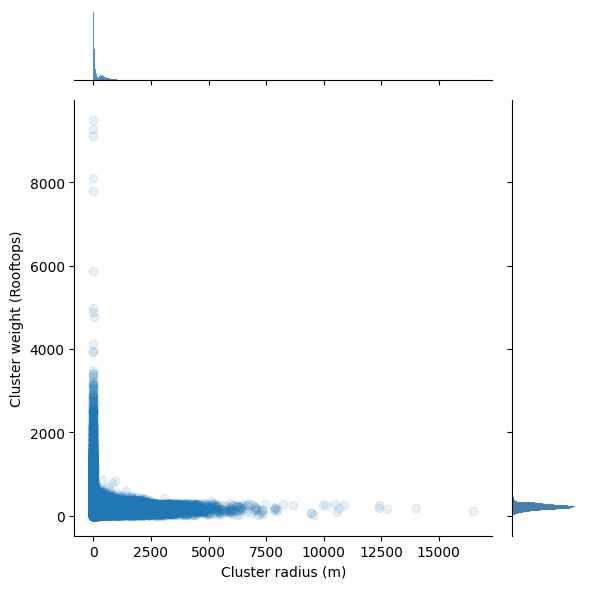

In [14]:
jointplot = plot_weights_vs_radii(
    cluster_df=cluster_gdf,
    output_filepath=OUTPUT_DATA_DIR / "cluster_weights_vs_radii.png",
)